# Introduction

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [75]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("train shape : ",train.shape)
print("test shape : ",test.shape)

train shape :  (614, 13)
test shape :  (367, 12)


In [76]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [78]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [79]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
print("columns of train data\n\n")
print(train.columns)
print("\ncolumns of test data\n\n")
print(test.columns)

columns of train data


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

columns of test data


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [81]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [82]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [83]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [84]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

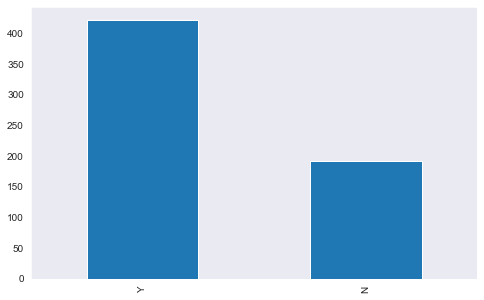

In [85]:
plt.figure(figsize=(8,5))
train['Loan_Status'].value_counts().plot.bar()

# Independent Variables (Categorical)

In [86]:
# categorical variables
s = (train.dtypes=='object')

print(list(s[s].index))

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


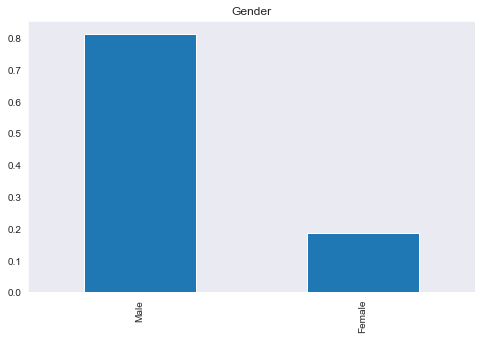

In [87]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(8,5),title='Gender')

### 80% of applicants are Male and 20% percent of applicants are Female

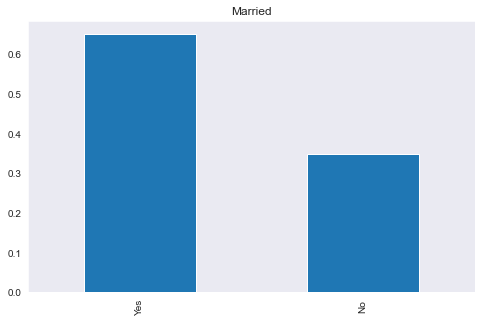

In [88]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(8,5),title='Married')
plt.show()

### Around 65% of applicants are married

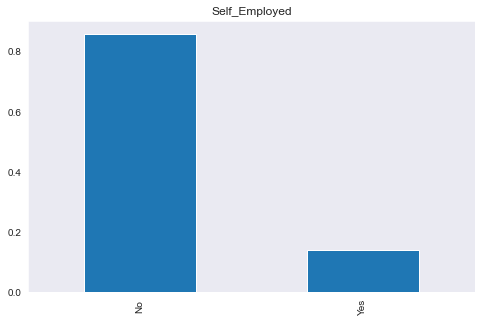

In [89]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(8,5),title='Self_Employed')
plt.show()

### around 85% of applicants are not self employeed

# Independent Variables(Ordinal)

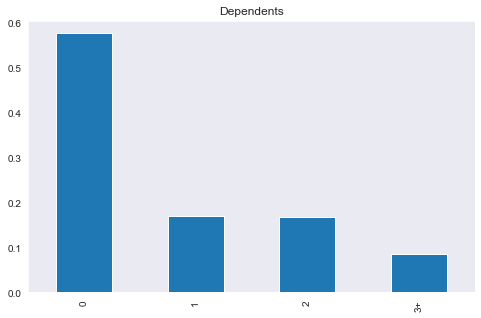

In [90]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(8,5),title='Dependents')
plt.show()

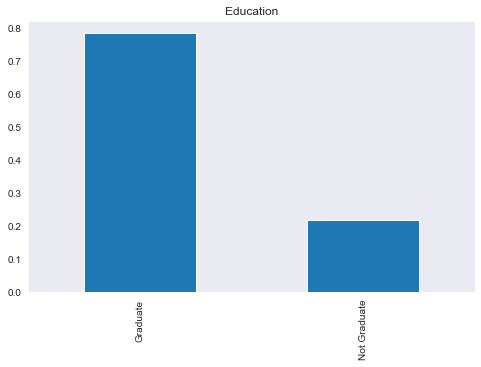

In [91]:
train['Education'].value_counts(normalize=True).plot.bar(figsize=(8,5),title='Education')
plt.show()

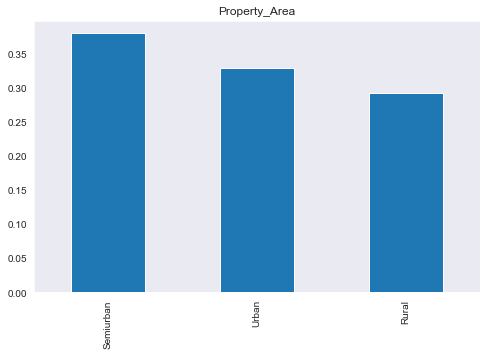

In [92]:
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(8,5),title='Property_Area')
plt.show()

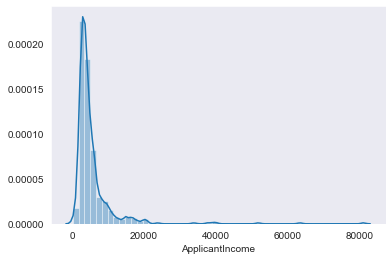

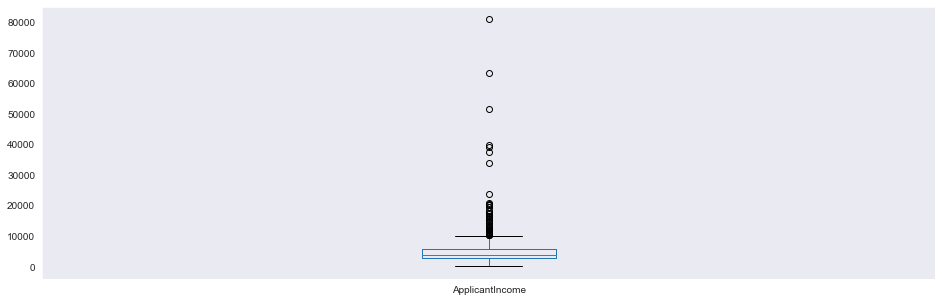

In [93]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

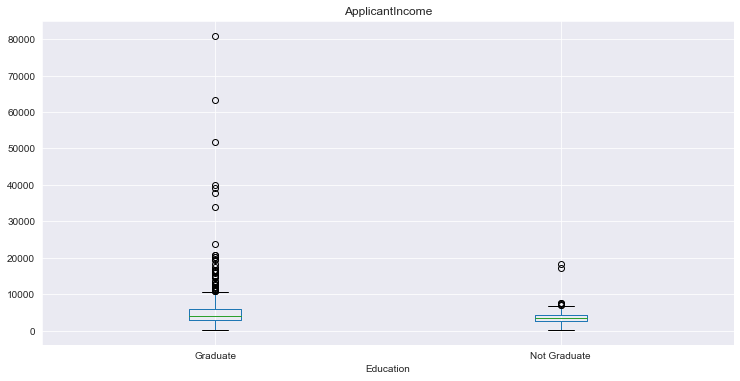

In [94]:
plt.rcParams['figure.figsize'] = (12, 6)
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

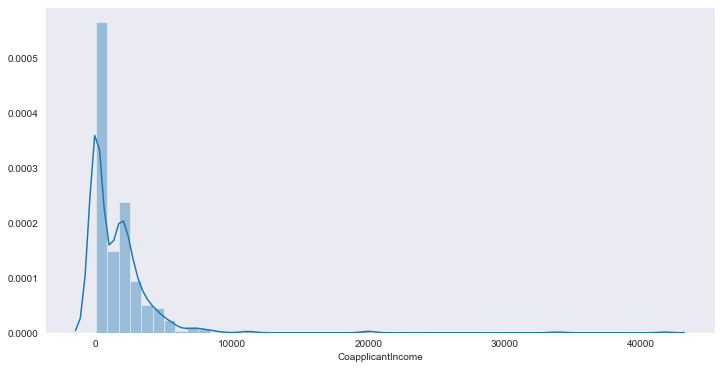

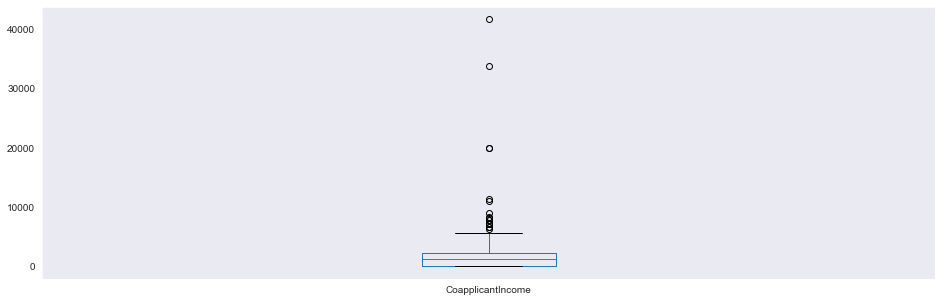

In [95]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

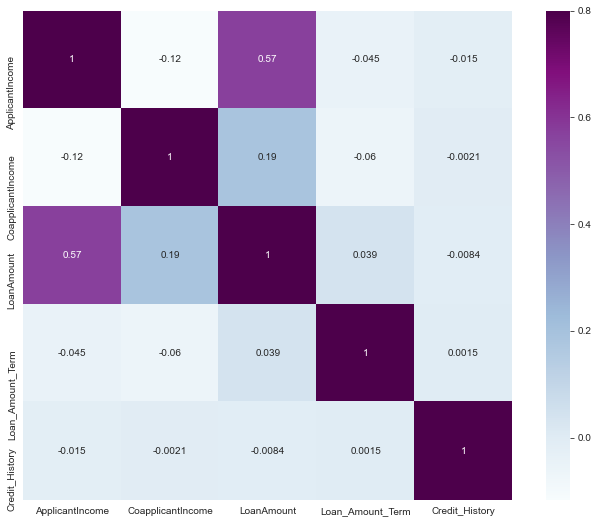

In [96]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

# Missing Values Imputation
#### Let’s list out feature-wise count of missing values.

In [97]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

There are very few missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

In [98]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [99]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [100]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in the loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [101]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [102]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [103]:
# Let's check whether all the missing values are filled in the datasets

In [104]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [105]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Outlier Treatment

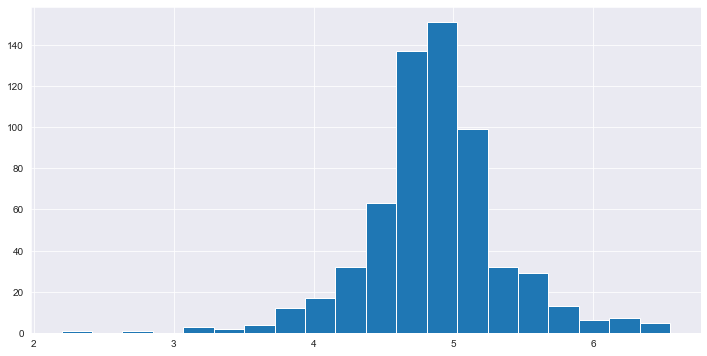

In [106]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

# Model Building

Let's drop the Loan_ID variable as it does not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [107]:
train = train.drop('Loan_ID',axis=1)
test =test.drop('Loan_ID',axis=1)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the training dataset and save it in another dataset.

In [108]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. The dummy variable turns categorical variables into a series of 0 and 1, making them a lot easier to quantify and compare.

In [109]:
X = pd.get_dummies(X)
train = X.copy()
test = pd.get_dummies(test)

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [112]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7621621621621621

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

# Model 2

In [113]:
from sklearn.model_selection import StratifiedKFold

In [114]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {}'.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index], X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\nMean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.7642276422764228

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8455284552845529

5 of kfold 5
accuracy_score 0.8032786885245902

Mean Validation Accuracy 0.7996801279488205


In [115]:
len(test.columns)

21

# Feature Engineering

##### Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

##### Total Income — As discussed during bivariate analysis we will combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loan approval might also be high.

##### EMI — EMI is the monthly amount to be paid by the applicant to repay the loan. The idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of the loan amount with respect to the loan amount term.

##### Balance Income — This is the income left after the EMI has been paid. The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [116]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

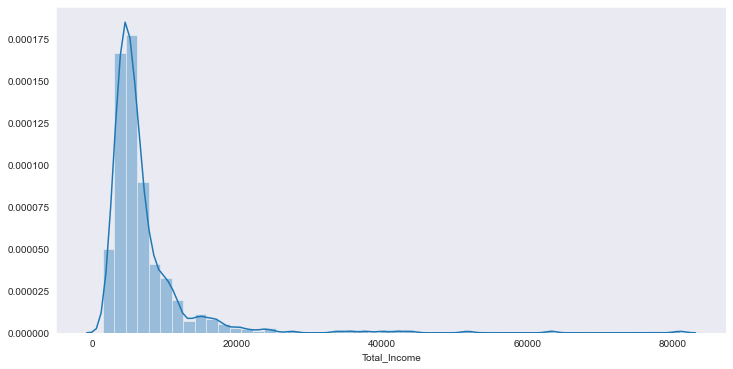

In [117]:
# let's check the distribution of total income
sns.distplot(train['Total_Income'])
plt.show()

##### We can see it is shifted towards left, i.e., the distribution is right-skewed. So, let’s take the log transformation to make the distribution normal.

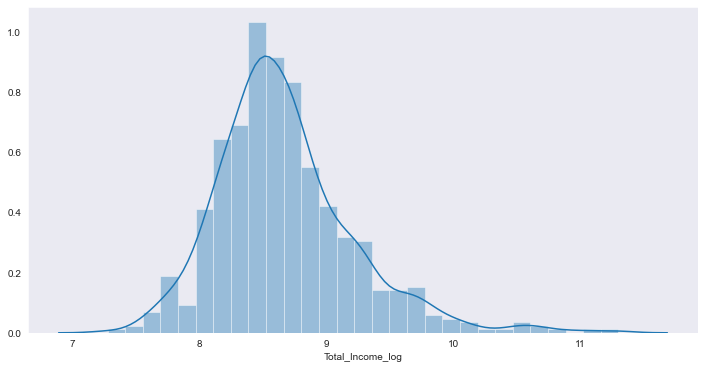

In [118]:
plt.figure(figsize=(12,6))
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])
sns.set_style('dark')

##### Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

In [119]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

#### Let’s check the distribution of the EMI variable.

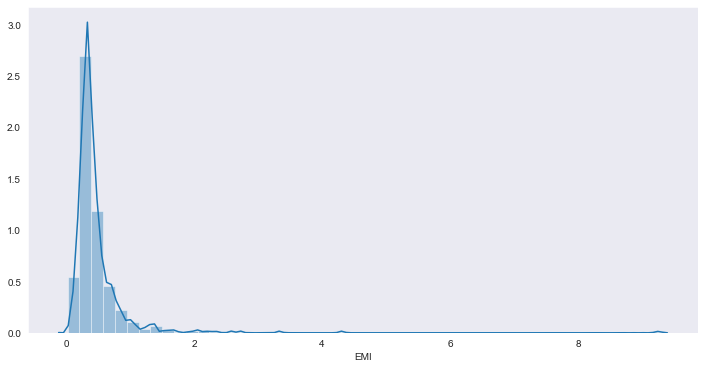

In [120]:
sns.distplot(train['EMI'])

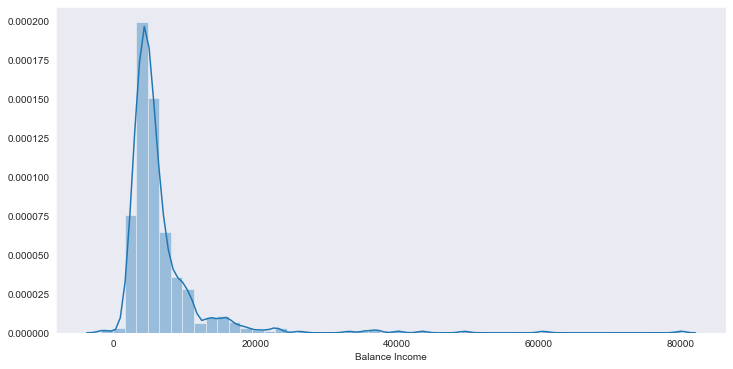

In [121]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])
plt.show()

#### Let us now drop the variables which we used to create these new features. The reason for doing this is, the correlation between those old features and these new features will be very high, and logistic regression assumes that the variables are not highly correlated. We also want to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [122]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income'], axis=1)

In [123]:
X = train 

# Model Building: Part II

### After creating new features, we can continue the model building process. So we will start with the logistic regression model and then move over to more complex models like RandomForest and XGBoost. We will build the following models in this section.

## * Logistic Regression
## * Decision Tree
## * Random Forest
## * XGBoost

##  Logistic Regression

In [124]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print(len(X.columns))
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    print ('\n Mean Validation Accuracy',mean/(i-1))

20

1 of kfold 5 
accuracy_score 0.7967479674796748

 Mean Validation Accuracy 0.7967479674796748
20

2 of kfold 5 
accuracy_score 0.8373983739837398

 Mean Validation Accuracy 0.8170731707317074
20

3 of kfold 5 
accuracy_score 0.7804878048780488

 Mean Validation Accuracy 0.804878048780488
20

4 of kfold 5 
accuracy_score 0.7804878048780488

 Mean Validation Accuracy 0.7987804878048781
20

5 of kfold 5 
accuracy_score 0.7868852459016393

 Mean Validation Accuracy 0.7964014394242304


In [125]:
X.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

In [126]:
test.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

## Decision Tree

#### Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on the most significant splitter/differentiator in input variables.

#### Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [127]:
# Let’s fit the decision tree model with 5 folds of cross-validation.
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\nMean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7479674796747967

2 of kfold 5 
accuracy_score 0.7154471544715447

3 of kfold 5 
accuracy_score 0.7560975609756098

4 of kfold 5 
accuracy_score 0.7398373983739838

5 of kfold 5 
accuracy_score 0.6639344262295082

Mean Validation Accuracy 0.7246568039450887


## Random Forest
### RandomForest is a tree-based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
### For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
### Final prediction can be a function of all the predictions made by the individual learners.
### In the case of a regression problem, the final prediction can be the mean of all the predictions.

In [128]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8211382113821138

2 of kfold 5 
accuracy_score 0.8130081300813008

3 of kfold 5 
accuracy_score 0.7886178861788617

4 of kfold 5 
accuracy_score 0.7967479674796748

5 of kfold 5 
accuracy_score 0.7786885245901639

 Mean Validation Accuracy 0.7996401439424231


#### We will try to improve the accuracy by tuning the hyperparameters for this model. We will use a grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.
#### We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in the random forest model.

## Grid Search

In [129]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})
grid_search.best_estimator_
RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [130]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.8373983739837398

3 of kfold 5 
accuracy_score 0.7886178861788617

4 of kfold 5 
accuracy_score 0.7967479674796748

5 of kfold 5 
accuracy_score 0.7868852459016393

 Mean Validation Accuracy 0.8045315207250432


In [131]:
pred_test = model.predict(test)

In [132]:
xvl

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_log,EMI,Balance Income
0,1.0,4.852030,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,8.674026,0.355556,5493.444444
10,1.0,4.248495,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,8.268732,0.194444,3705.555556
19,1.0,4.744932,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,8.716044,0.319444,5780.555556
24,1.0,5.017280,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,8.801168,0.419444,6222.555556
37,1.0,4.969813,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,8.542081,0.400000,4726.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,1.0,4.248495,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,7.680176,0.194444,1970.555556
588,1.0,4.543295,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,8.465900,0.261111,4488.888889
595,1.0,4.700480,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,8.251403,0.305556,3527.444444
607,1.0,5.056246,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,8.593784,0.436111,4961.888889


### Let us find the feature importance now, i.e. which features are most important for this problem. We will use the feature_importances_ attribute of sklearn to do so.

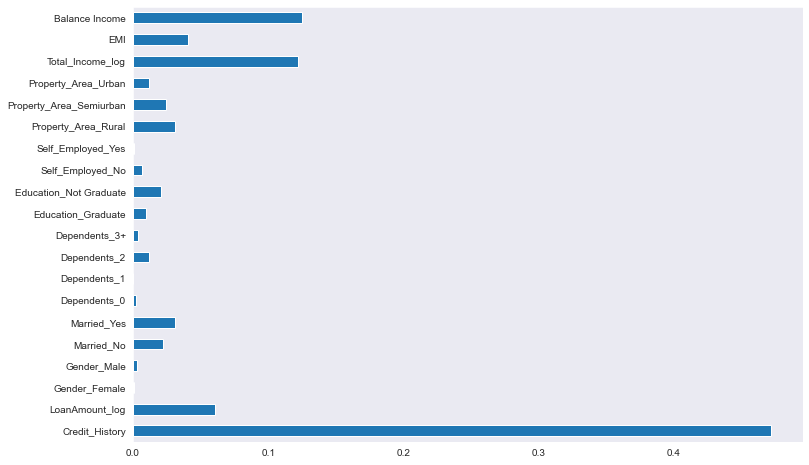

In [133]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

### We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

## Xgboost

#### XGBoost is a fast and efficient algorithm and has been used by the winners of many data science competitions. It’s a boosting algorithm

#### XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.
#### n_estimator: This specifies the number of trees for the model.
#### max_depth: We can specify the maximum depth of a tree using this parameter.

In [134]:
from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = X.loc[train_index],X.loc[test_index] 
 ytr,yvl = y[train_index],y[test_index] 
 model = XGBClassifier(n_estimators=50, max_depth=4) 
 model.fit(xtr, ytr) 
 pred_test = model.predict(xvl) 
 score = accuracy_score(yvl,pred_test) 
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.7804878048780488

2 of kfold 5
accuracy_score 0.7886178861788617

3 of kfold 5
accuracy_score 0.7642276422764228

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7622950819672131

 Mean Validation Accuracy 0.7752232440357191
